In [1]:
import sys
import sklearn

#NN Surrogate model class
from injector_surrogate_quads import *

from emittance_calc import getNormEmit
from sampling_functions import getGroundTruth, getBeamsize

sys.path.append('../configs')
#Sim reference point to optimize around
from ref_config import ref_point

# Load injector model

In [2]:
Model = Surrogate_NN()

Model.load_saved_model(model_path = '../models/', \
                       model_name = 'modelsmodel_OTR2_NA_rms_emit_elu_2021-07-27T19:54:57-07:00')
Model.load_scaling()
Model.take_log_out = False

# Sampling functions examples

1- beam size request (from surrogate) [input =  setting, quad (n=1), output = beamsize] ----> uncouple from fn below \
2- emittance calc request [input = quad (n>=3), beamsize (n), output  = emittance] ----> fn from module\
3- ground truth request [input = setting, output = emittance] -----> already exists, need wrapper fn 

### Beam size request example (machine units)
(these can be in sim units or machine units and can be converted back and forth. The functions here are coded in machine units.)

In [3]:
'''Returns the beamsize (xrms, yrms) prediction [m] from the surrogate model
for given settings of SOL1, SQ01, CQ01 and scanning quad measurement setting QE04 '''

getBeamsize(Model, ref_point,   0.4657  , -0.007063 ,-0.01989  , -3 )

array([0.00041913, 0.00057913], dtype=float32)

### Emittance calculation request

4.899162310429291e-07

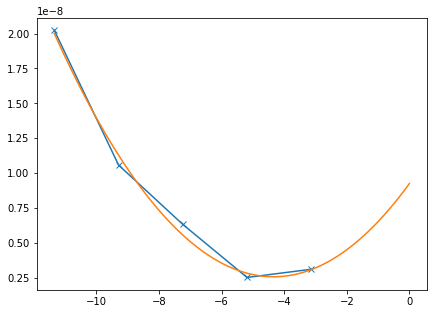

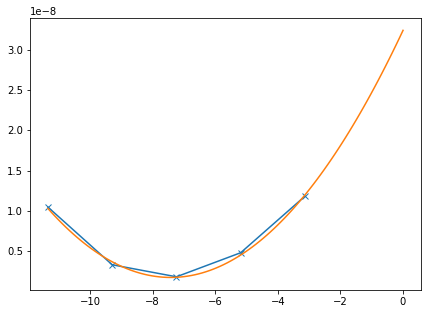

In [4]:
# Random example given an energy, quad gradients, and beamsizes
energy = 0.135 
quad_grad = np.array([-5.517900,  -4.519675, -3.521450, -2.523225, -1.525000])
x_rms = np.array([142.252185, 102.829644, 79.477429, 50.142066,  55.691068])*1e-6
y_rms = np.array([102.315915, 57.603621, 42.734515, 69.352124, 108.715472])*1e-6

'''Returns normalized emittance [m] given quad values and beamsizes'''
getNormEmit(energy, quad_grad, x_rms, y_rms) 

NOTE: if getNormEmit() can't calculate the emittance, typically because the fit is bad (not second degree poly), it assigns a value of 1000 to the emittance (high value for the optimizer). 

### Ground truth request example (machine units)

In [5]:
'''Returns normalized emittance prediction [m] from the surrogate model
for given settings of SOL1, SQ01, and CQ01 '''

#getGroundTruth(Model, ref_point, 0.4625, 0.01512 , -0.0189 )
getGroundTruth(Model, ref_point,  0.4657  , -0.0071 , -0.0169 )/1e-6

array([1.3955553], dtype=float32)

1 -  ~~quad gradient? does that affect it?~~
2 - ~~check equations~~
3- ~~is the xrms the total beamsize here? ...~~
4- biggest effect is fit itself
5 -  different meas ranges for x and y?? compare emitx and emity instead??